**INTEGRANTES:**
1. José Ignacio Rengifo Villegas
2. Sergio David Bravo Talero

# Laboratorio 1: Desarrollo de una herramienta analítica

En este documento se da a conocer la implementación realizada por los estudiantes: 
- José Rengifo: 2021
- Sergio Bravo: 200714733

## Fase 1: OBTENER E INSPECCIONAR ARCHIVOS
### Misión 1: Parsear la data

In [1]:
def loadDataFromFilteAt(path):
    return open(path, 'r', newline = '\r\n').read().splitlines()

def loadData():
    edades = loadDataFromFilteAt("Archivos/edad.txt")
    edades = [int(i) for i in edades]

    estadosCiviles = loadDataFromFilteAt("Archivos/estado_civil.txt") 
    escolaridades = loadDataFromFilteAt("Archivos/escolaridad.txt")
    
    estratos = loadDataFromFilteAt("Archivos/estrato.txt")
    estratos = [int(i) for i in estratos]

    generos = loadDataFromFilteAt("Archivos/genero.txt")
    
    promedios = loadDataFromFilteAt("Archivos/promedio.txt")
    promedios = [float(i) for i in promedios]

    regiones = loadDataFromFilteAt("Archivos/region.txt")
    data = [edades, estadosCiviles, escolaridades, estratos, generos, promedios, regiones]
    return data
 
(edades, estadosCiviles, escolaridades, estratos, generos, promedios, regiones) = loadData()

### Misión 2: Calcular estadísticas

A continuación los calculos realizados para obtener las medias y las desviaciones estándar para los parámetros: edades, estratos y promedio.

In [2]:
import functools
import math

dataSize = min(len(edades), len(estadosCiviles), len(escolaridades), len(estratos), len(generos), len(promedios), len(regiones))
def getMeans():
    suma_edades = functools.reduce(lambda a, b: a + b, edades, 0)
    suma_estrato = functools.reduce(lambda a, b: a + b, estratos, 0)
    suma_promedio = functools.reduce(lambda a, b: a + b, promedios, 0)
    return (suma_edades / dataSize,
            suma_estrato / dataSize,
            suma_promedio / dataSize)

def getDeviation():
    medias = getMeans()
    desviacion_edades = math.sqrt(functools.reduce(lambda a, b: a + math.pow(b - medias[0], 2), edades, 0) / (dataSize - 1))
    desviacion_estrato = math.sqrt(functools.reduce(lambda a, b: a + math.pow(b - medias[1], 2), estratos, 0) / (dataSize - 1))
    desviacion_promedio = math.sqrt(functools.reduce(lambda a, b: a + math.pow(b - medias[2], 2), promedios, 0) / (dataSize - 1))
    return(desviacion_edades, desviacion_estrato, desviacion_promedio)

desviaciones = getDeviation()
medias = getMeans()


Acá las gráficas para representar el problema:

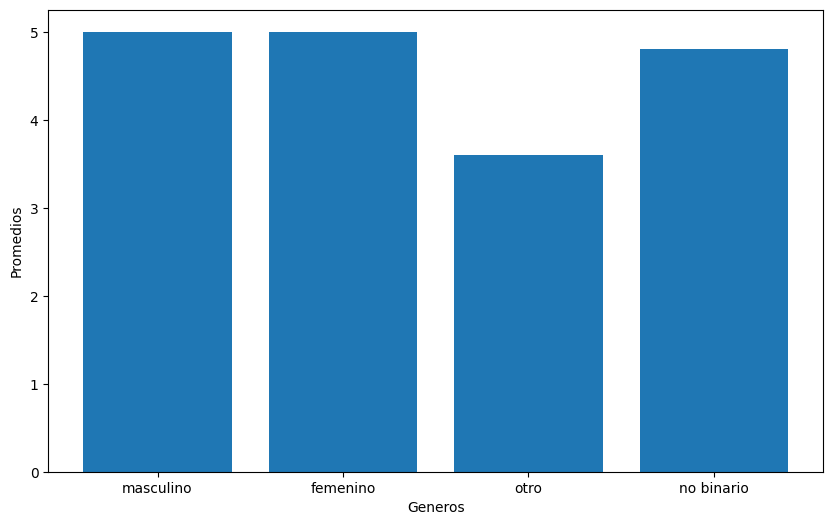

In [3]:
import matplotlib.pyplot as plt

xPositions = list(range(0, 500))
fig, ax = plt.subplots(figsize=(10, 6))
# ax.scatter(x = estratos, y = promedios)
ax.bar(generos, promedios)

plt.xlabel("Generos")
plt.ylabel("Promedios")

plt.show()

**COMENTARIOS:** 

No se percibe diferencia en el promedio obtenido entre las mujeres y los hombres, los otros generos que no caen en estos dos rangos tuvieron un menor promedio, siendo "otro" el de menor promedio


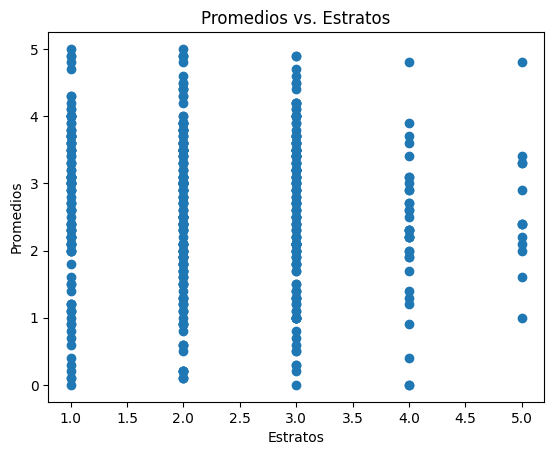

In [4]:
plt.scatter(estratos, promedios)
#plt.xticks(np.arange(1, 6, 1))
plt.title('Promedios vs. Estratos')
plt.xlabel('Estratos')
plt.ylabel('Promedios')
plt.show()

**Conclusiones** 

Gran parte de la data/observaciones esta distribuida en los estratos 1,2,3 y 4... con una menor proporción en el estrato 5, en el cual los promedios estuvieron en su mayoria entre 2 y 4. 

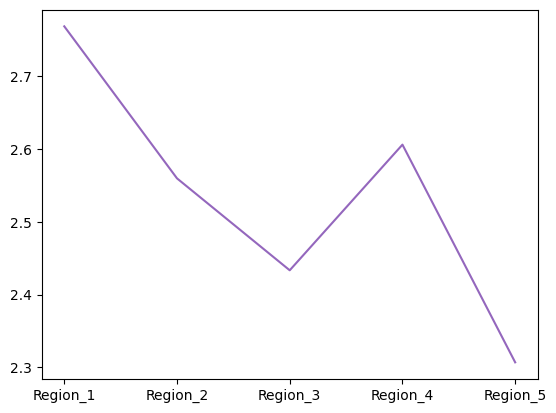

In [5]:
from statistics import mean
def relativeMean(groups,  estadistico):
#    groups.sort()    
    groupedValues = []
    for g in groups:       
        try: 
            groupedValues.index(g)
        except:
            groupedValues.append(g)
    
    diccionarioAgrupaciones = dict.fromkeys(groupedValues,[])
    i = 0
    matrizValores=[]
    for gv in groupedValues:
        matrizValores.append([])
    for e in estadistico:
        matrizValores[groupedValues.index(groups[i])].append(e)
        i = i + 1
    for gv in groupedValues:
        diccionarioAgrupaciones.update({gv:mean(matrizValores[groupedValues.index(gv)])})
    
    return diccionarioAgrupaciones
    
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
diccValores = relativeMean(regiones,  promedios)
ax.plot(list(diccValores.keys()), 
        list(diccValores.values()),
        color = 'tab:purple')
plt.show()

**Conclusiones** 

En la Región 1 se obtuvieron los mayores promedios y en la región 5 los menores, para la región 2 3 y 4 se obtuvieron resultados similares, los cuales van entre 2.6 y 2.4 

## FASE 2

### Misión 3: Pregunta de negocio
| Tipo | Pregunta |
| ---- | -------- |
| Negocio | ¿Cuáles son los estudiantes que se le asignarán becas para el ingreso a la universidad de los Alpes? |
| Analytics | ¿Cuál es el conjunto de estudiantes mediante el cual se maximizan los resultados del programa de becas de los Alpes? |

### Misión 4:

In [6]:
# Número de becas
N = 20

class Estudiante:
    def __init__(self, id, edad, estadoCivil, escolaridad, estrato, genero, promedio, region):
        self.id = id
        self.edad = edad
        self.estadoCivil = estadoCivil
        self.escolaridad = escolaridad
        self.estrato = estrato
        self.genero = genero
        self.promedio = promedio
        self.region = region
        
estudiantes = []
for idx in list(range(0, 500)):
    estudiante = Estudiante(idx, 
    edades[idx],
    estadosCiviles[idx],
    escolaridades[idx],
    estratos[idx],
    generos[idx],
    promedios[idx],
    regiones[idx])

    estudiantes.append(estudiante)

In [10]:
def opcion1Becas_A_Otorgar_XGeneroYRegion(nroBecas):
    indiceGeneros = []
    indiceRegiones = []
    for e in estudiantes:       
        try: 
            indiceGeneros.index(e.genero)
        except:
            indiceGeneros.append(e.genero)
        try: 
            indiceRegiones.index(e.region)
        except:
            indiceRegiones.append(e.region)
    i = 0
    matrizPromediosRegionGenero=[]
    becados=[]
    for r in indiceRegiones:
        matrizPromediosRegionGenero.append([])
        becados.append([])
        for g in indiceGeneros:
            matrizPromediosRegionGenero[indiceRegiones.index(r)].append([])
            becados[indiceRegiones.index(r)].append([])
    numero_total_encuestados = 0    
    for e in estudiantes:
        matrizPromediosRegionGenero[indiceRegiones.index(e.region)][indiceGeneros.index(e.genero)].append(e.promedio) 
        numero_total_encuestados = numero_total_encuestados +1

    dicc_reg_gen = {}
    for r in indiceRegiones:
        for g in indiceGeneros:
            becas_x_sub = round((nroBecas*(len(matrizPromediosRegionGenero[indiceRegiones.index(r)][indiceGeneros.index(g)])/numero_total_encuestados)))
            mejores_promedios_sub = matrizPromediosRegionGenero[indiceRegiones.index(r)][indiceGeneros.index(g)]
            mejores_promedios_sub.sort()
            mejores_promedios_sub.reverse()
            becas_a_otorgar = 0
            while becas_a_otorgar < becas_x_sub: 
                dicc_reg_gen.setdefault(str(r)+'-'+str(g)+'-becado-'+str(becas_a_otorgar+1), mejores_promedios_sub[becas_a_otorgar])
                becas_a_otorgar = becas_a_otorgar + 1
                becados[indiceRegiones.index(r)][indiceGeneros.index(g)].append(mejores_promedios_sub[becas_a_otorgar])
    
    return (becados, indiceRegiones, indiceGeneros)

### Misión 5:

In [49]:
def opcion1Becas_A_Otorgar_XGeneroYRegion(nroBecas):
    indiceGeneros = []
    indiceRegiones = []
    for e in estudiantes:       
        try: 
            indiceGeneros.index(e.genero)
        except:
            indiceGeneros.append(e.genero)
        try: 
            indiceRegiones.index(e.region)
        except:
            indiceRegiones.append(e.region)
    i = 0
    matrizPromediosRegionGenero=[]
    becados=[]
    for r in indiceRegiones:
        matrizPromediosRegionGenero.append([])
        becados.append([])
        for g in indiceGeneros:
            matrizPromediosRegionGenero[indiceRegiones.index(r)].append([])
            becados[indiceRegiones.index(r)].append([])
    numero_total_encuestados = 0    
    
    for e in estudiantes:
        matrizPromediosRegionGenero[indiceRegiones.index(e.region)][indiceGeneros.index(e.genero)].append(e) 
        
        numero_total_encuestados = numero_total_encuestados +1

    dicc_reg_gen = {}
    resultados = []
    for r in indiceRegiones:
        for g in indiceGeneros:
            becas_x_sub = round((nroBecas*(len(matrizPromediosRegionGenero[indiceRegiones.index(r)][indiceGeneros.index(g)])/numero_total_encuestados)))
            mejores_promedios_sub = matrizPromediosRegionGenero[indiceRegiones.index(r)][indiceGeneros.index(g)]
            mejores_promedios_sub = sorted(mejores_promedios_sub, key= lambda x: x.promedio, reverse=True)
            becas_a_otorgar = 0
            
            while becas_a_otorgar < becas_x_sub: 
                bestStudent = mejores_promedios_sub[becas_a_otorgar]
                resultados.append(bestStudent)
                becas_a_otorgar = becas_a_otorgar + 1
    
    return resultados


### Misión 6: 

In [60]:
resultadosPropuesta1 = opcion1Becas_A_Otorgar_XGeneroYRegion(30)
resultadosPropuesta2 = getResultadosPropuesta2(30)

def ordenarResultadosPorGenero(resultados):
    generosValores = list(set(generos))
    resultadosPorGenero = {}
    for gender in generosValores:
        partialResult = list(filter(lambda res: res.genero == gender, resultados))
        resultadosPorGenero[gender] = partialResult
    return resultadosPorGenero

def ordenarResultadosPorEstrato(resultados):
    estratosValores = list(set(estratos))
    resultadosPorEstratos = {}
    for estrato in estratosValores:
        partialResult = list(filter(lambda res: res.estrato == estrato, resultados))
        resultadosPorEstratos[estrato] = partialResult
    return resultadosPorEstratos

def ordenarResultadosPorRegion(resultados):
    regionesValores = list(set(regiones))
    resultadosPorRegion = {}
    for region in regionesValores:
        partialResult = list(filter(lambda res: res.region == region, resultados))
        resultadosPorRegion[region] = partialResult
    return resultadosPorRegion

valoresPropuesta1 = (ordenarResultadosPorGenero(resultadosPropuesta1), 
                     ordenarResultadosPorEstrato((resultadosPropuesta1)),
                     ordenarResultadosPorRegion((resultadosPropuesta1)))

valoresPropuesta2 = (ordenarResultadosPorGenero(resultadosPropuesta2), 
                     ordenarResultadosPorEstrato((resultadosPropuesta2)),
                     ordenarResultadosPorRegion((resultadosPropuesta2)))